# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head() 

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [6]:
#1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em 'tip', explicada por 'sex', 'smoker', 'diner' e 'net_bill'
y, X = patsy.dmatrices('tip ~ sex + smoker + C(size)+ time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 10)
  Columns:
    ['Intercept',
     'sex[T.Female]',
     'smoker[T.No]',
     'C(size)[T.2]',
     'C(size)[T.3]',
     'C(size)[T.4]',
     'C(size)[T.5]',
     'C(size)[T.6]',
     'time[T.Dinner]',
     'net_bill']
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'C(size)' (columns 3:8)
    'time' (column 8)
    'net_bill' (column 9)
  (to view full data, use np.asarray(this_obj))

In [7]:
#2. Remova as variáveis não significantes.
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     15.44
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.08e-19
Time:                        13:57:57   Log-Likelihood:                -368.07
No. Observations:                 244   AIC:                             756.1
Df Residuals:                     234   BIC:                             791.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9794      0.591      1.657      0.099      -0.185       2.144
sex[T.Female]     -0.0041      0.154     -0.027      0.979      -0.308       0.300
smoker[T.No]       0.0030      0.153      0.020      0.984      -0.298       0.304
C(size)[T.2]       0.5328      0.575      0.926      0.355      -0.601       1.666
C(size)[T.3]       0.8835      0.613      1.441      0.151      -0.324       2.091
C(size)[T.4]       1.2827      0.631      2.034      0.043       0.040       2.525
C(size)[T.5]       1.0624      0.787      1.350      0.178      -0.488       2.612
C(size)[T.6]       2.0228      0.846      2.390      0.018       0.356       3.690
time[T.Dinner]     0.0533      0.169      0.315      0.753      -0.280       0.386
net_bill           0.0746      0.011      6.525      0.000       0.052       0.097
==============================================================================
Omnibus:                       43.168   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.462
Skew:                           0.892   Prob(JB):                     2.77e-19
Kurtosis:                       5.285   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y, X = patsy.dmatrices('tip ~ C(size) + net_bill + 1', tips)
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     23.43
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.10e-21
Time:                        13:59:35   Log-Likelihood:                -368.12
No. Observations:                 244   AIC:                             750.2
Df Residuals:                     237   BIC:                             774.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0019      0.559      1.793      0.074      -0.099       2.102
C(size)[T.2]     0.5399      0.569      0.949      0.344      -0.581       1.661
C(size)[T.3]     0.8991      0.604      1.490      0.138      -0.290       2.088
C(size)[T.4]     1.2966      0.619      2.094      0.037       0.077       2.516
C(size)[T.5]     1.0720      0.777      1.380      0.169      -0.459       2.603
C(size)[T.6]     2.0015      0.827      2.420      0.016       0.372       3.631
net_bill         0.0750      0.011      6.837      0.000       0.053       0.097
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.161
Skew:                           0.900   Prob(JB):                     1.95e-19
Kurtosis:                       5.287   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

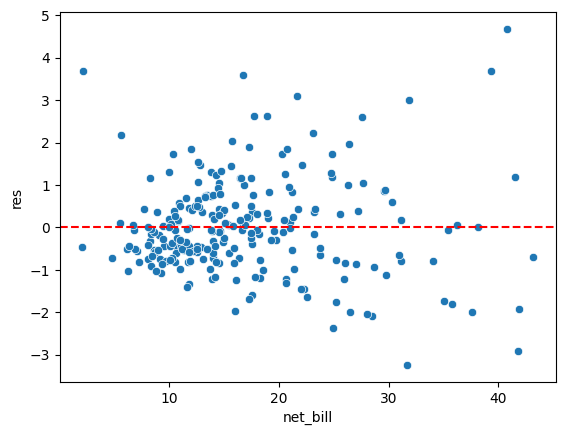

In [9]:
#3. observe o gráfico de resíduos em função de 'net_bill'
tips['res'] = reg.resid 
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

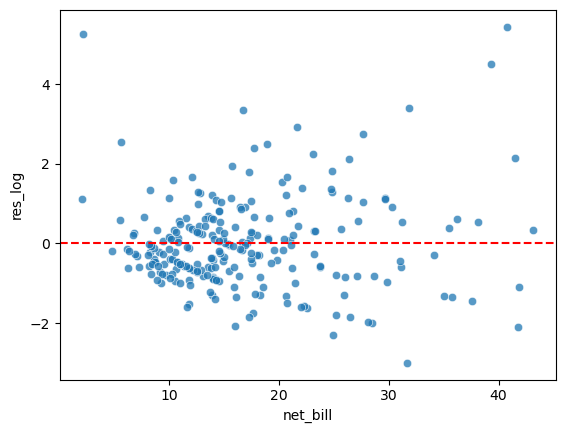

In [9]:
#4. teste transformar 'net_bill' no log e um polinômio. Escolha o melhor modelo.
reg_log = smf.ols('tip ~ np.log(net_bill)',tips).fit()
tips['res_log'] = reg_log.resid
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

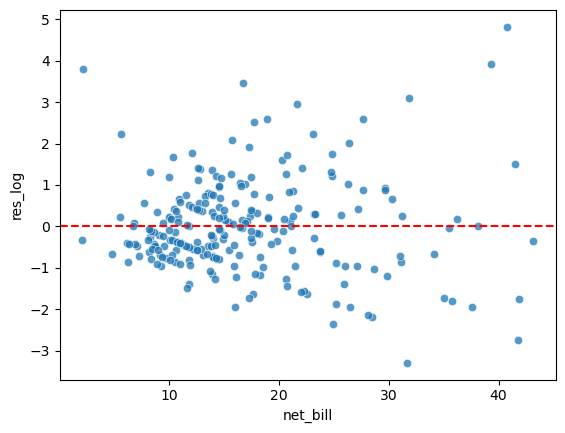

In [10]:
reg_log = smf.ols('tip ~ net_bill + np.power(net_bill,2)',tips).fit()
tips['res_log'] = reg_log.resid
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [25]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,res,res_log,res_pol
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-1.975506,-1.946872,-1.905881
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-0.602534,-0.480619,-0.534884
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.358799,0.381382,0.432253
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,-0.115797,-0.102297,-0.042031
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.126948,0.136528,0.197278
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,2.221548,2.236945,2.295226
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,-1.760517,-1.880730,-1.831022
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,-1.315175,-1.442447,-1.381877
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,-1.247907,-1.216476,-1.174810


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [4]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.21e-18
Time:                        10:15:22   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Foram removidas as variáveis sec e time pq se demonstraram não significantes para o modelo

In [12]:
y, X = patsy.dmatrices('np.log(tip) ~ smoker + net_bill', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           2.31e-20
Time:                        14:05:08   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

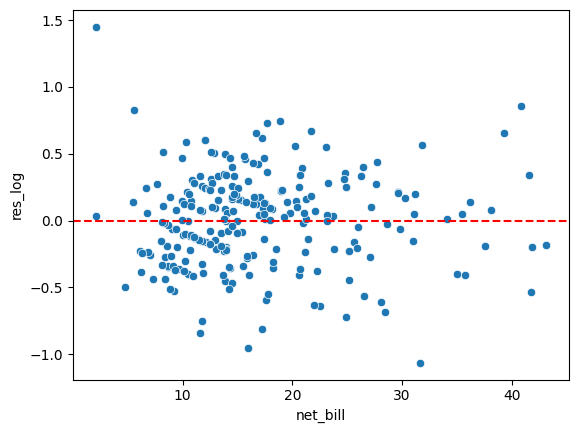

In [28]:
reg_tips_log = smf.ols('np.log(tip) ~ C(size) + np.log(net_bill)', data = tips).fit()

tips['res_log'] = reg_tips_log.resid
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('previsao_de_renda.csv')
df.drop("Unnamed: 0",axis=1,inplace=True)

df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [36]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:26:38   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

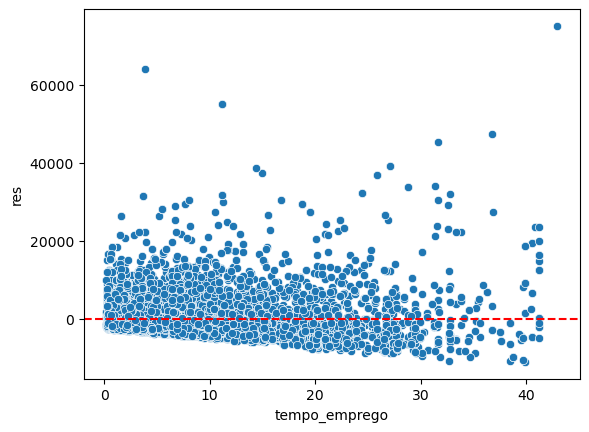

In [37]:
df['res'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [53]:
reg = smf.ols('renda ~ sexo  + posse_de_veiculo  + posse_de_imovel + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     160.2
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:56:23   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12443   BIC:                         2.442e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          431.8517    571.404      0.756      0.450    -688.188    1551.891
sexo[T.M]                         2369.2970     88.053     26.907      0.000    2196.699    2541.895
posse_de_veiculo[T.True]           -76.8766     84.688     -0.908      0.364    -242.879      89.126
posse_de_imovel[T.True]            354.3875     83.325      4.253      0.000     191.059     517.716
tipo_renda[T.Bolsista]            -839.0588   2155.242     -0.389      0.697   -5063.667    3385.549
tipo_renda[T.Empresário]          1018.5277     90.103     11.304      0.000     841.912    1195.143
tipo_renda[T.Pensionista]         1700.8135   1437.166      1.183      0.237   -1116.253    4517.881
tipo_renda[T.Servidor público]     441.3520    130.469      3.383      0.001     185.613     697.091
educacao[T.Pós graduação]         2233.3042   1080.854      2.066      0.039     114.662    4351.946
educacao[T.Secundário]            -234.0717    437.743     -0.535      0.593   -1092.116     623.973
educacao[T.Superior completo]      345.1681    439.585      0.785      0.432    -516.486    1206.823
educacao[T.Superior incompleto]   -292.5524    470.963     -0.621      0.534   -1215.713     630.608
estado_civil[T.Separado]          -164.1900    170.393     -0.964      0.335    -498.187     169.807
estado_civil[T.Solteiro]            42.3020    121.071      0.349      0.727    -195.015     279.619
estado_civil[T.União]              -51.3247    143.547     -0.358      0.721    -332.699     230.049
estado_civil[T.Viúvo]             -361.4013    250.853     -1.441      0.150    -853.111     130.309
tipo_residencia[T.Casa]           -348.9004    328.570     -1.062      0.288    -992.949     295.148
tipo_residencia[T.Com os pais]    -640.6464    368.485     -1.739      0.082   -1362.933      81.641
tipo_residencia[T.Comunitário]    -586.0893    634.021     -0.924      0.355   -1828.868     656.689
tipo_residencia[T.Estúdio]        -955.3406    547.114     -1.746      0.081   -2027.770     117.088
tipo_residencia[T.Governamental]  -870.8851    397.155     -2.193      0.028   -1649.370     -92.400
idade                               28.1108      4.596      6.116      0.000      19.102      37.120
tempo_emprego                      299.4576      6.137     48.795      0.000     287.428     311.487
==============================================================================
Omnibus:                    10071.957   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           431782.244
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      30.930   Cond. No.                     2.38e+03
==============================================================

Removendo variáveis não significantes para o modelo

In [62]:
df['tipo_renda_Empresario'] = (df['tipo_renda'] == 'Empresário').astype(int)
df['tipo_renda_ServidorPublico'] = (df['tipo_renda'] == 'Servidor público').astype(int)
df['educacao_PosGraduacao'] = (df['educacao'] == 'Pós graduação').astype(int)
df['tipo_residencia_Governamental'] = (df['tipo_residencia'] == 'Governamental').astype(int)

reg = smf.ols(
    "renda ~ sexo + posse_de_imovel + tipo_renda_Empresario + tipo_renda_ServidorPublico + educacao_PosGraduacao + tipo_residencia_Governamental + tempo_emprego",
    df
).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     486.8
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:13:08   Log-Likelihood:            -1.2204e+05
No. Observations:               12466   AIC:                         2.441e+05
Df Residuals:                   12458   BIC:                         2.441e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1009.2343     94.118     10.723      0.000     824.749    1193.719
sexo[T.M]                      2292.0754     81.706     28.053      0.000    2131.918    2452.233
posse_de_imovel[T.True]         439.2754     81.914      5.363      0.000     278.712     599.839
tipo_renda_Empresario          1057.1408     89.833     11.768      0.000     881.055    1233.227
tipo_renda_ServidorPublico      489.0648    129.880      3.766      0.000     234.481     743.649
educacao_PosGraduacao          2240.6806    992.622      2.257      0.024     294.987    4186.374
tipo_residencia_Governamental  -494.0989    230.992     -2.139      0.032    -946.878     -41.320
tempo_emprego                   310.9899      5.839     53.263      0.000     299.545     322.435
==============================================================================
Omnibus:                    10067.515   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427117.767
Skew:                           3.579   Prob(JB):                         0.00
Kurtosis:                      30.768   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Realizando análise dos resíduos

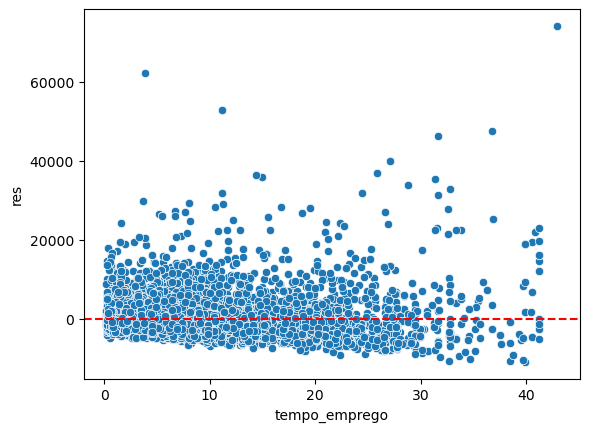

In [63]:
df['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sexo', ylabel='res'>

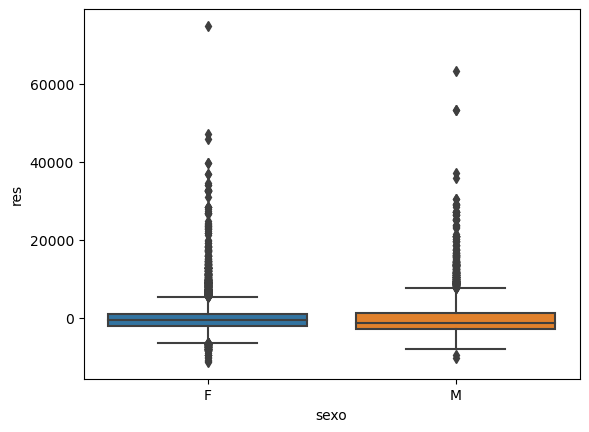

In [34]:
sns.boxplot(x = 'sexo', y = 'res', data = df)

<Axes: xlabel='posse_de_imovel', ylabel='res'>

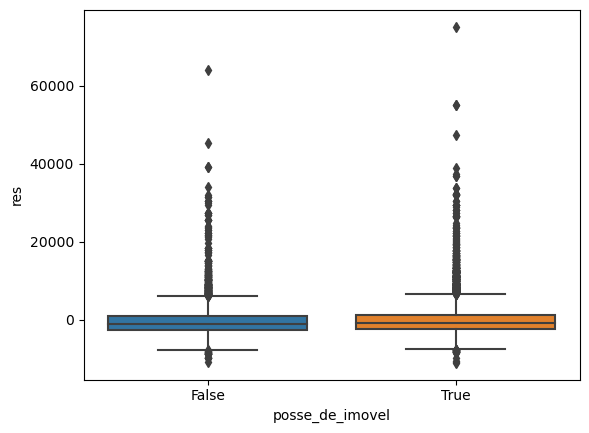

In [40]:
sns.boxplot(x = 'posse_de_imovel', y = 'res', data = df)

<Axes: xlabel='tipo_renda', ylabel='res'>

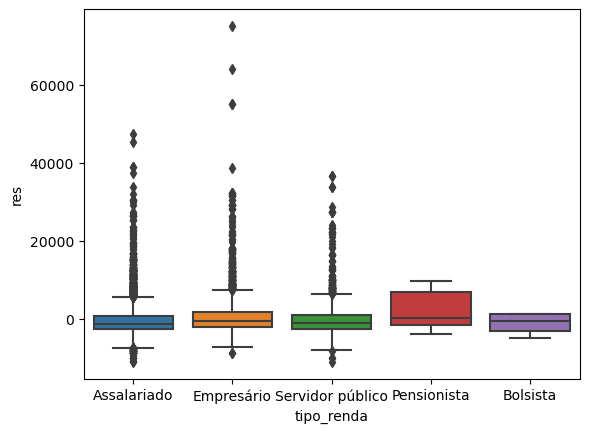

In [42]:
sns.boxplot(x = 'tipo_renda', y = 'res', data = df)

<Axes: xlabel='tipo_residencia', ylabel='res'>

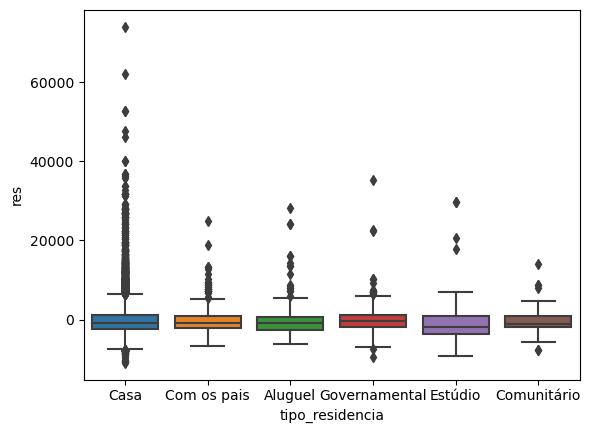

In [64]:
sns.boxplot(x = 'tipo_residencia', y = 'res', data = df)

Análise dos valores preditos

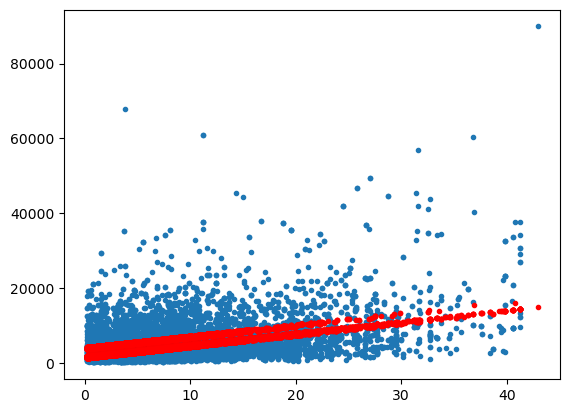

In [52]:
df['pred'] = reg.fittedvalues

plt.plot(df['tempo_emprego'], df['renda'], '.')
plt.plot(df['tempo_emprego'], df['pred'], 'r.')